In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

mush = pd.read_csv("mushroom.csv")

In [31]:
mush.shape

(2000, 25)

In [2]:
mush.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [32]:
mush.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

Discover a clear overview that defines the significance of each column. Understanding these details is essential for making informed decisions.
---

| **Column Name**                        | **Description**                                                                                  |
|----------------------------------------|--------------------------------------------------------------------------------------------------|
| **cap_shape**                         | The shape of the mushroom cap (e.g., convex, conical, bell-shaped).                           |
| **cap_surface**                       | The texture of the cap surface (e.g., scaly, smooth, fibrous).                                |
| **cap_color**                         | The color of the mushroom cap (e.g., brown, red, white).                                       |
| **bruises**                           | Indicates whether the mushroom can bruise (e.g., yes, no).                                     |
| **odor**                              | The odor of the mushroom (e.g., almond, anise, foul).                                          |
| **gill_attachment**                   | The way the gills are attached to the stalk (e.g., attached, free).                             |
| **gill_spacing**                      | The spacing between the gills (e.g., close, crowded).                                          |
| **gill_size**                         | The size of the gills (e.g., broad, narrow).                                                  |
| **gill_color**                        | The color of the gills (e.g., black, brown, gray).                                            |
| **stalk_shape**                       | The shape of the stalk (e.g., tapering, enlarging).                                            |
| **stalk_root**                        | The shape of the stalk's root (e.g., bulbous, club, equal).                                    |
| **stalk_surface_above_ring**          | The texture of the stalk surface above the ring (e.g., fibrous, scaly, smooth).                |
| **stalk_surface_below_ring**          | The texture of the stalk surface below the ring (e.g., fibrous, scaly, smooth).                |
| **stalk_color_above_ring**            | The color of the stalk above the ring (e.g., brown, gray, white).                              |
| **stalk_color_below_ring**            | The color of the stalk below the ring (e.g., brown, gray, white).                              |
| **veil_type**                         | The type of veil (e.g., partial).                                                               |
| **veil_color**                        | The color of the veil (e.g., brown, white, yellow).                                            |
| **ring_number**                       | The number of rings on the stalk (e.g., none, one, two).                                       |
| **ring_type**                         | The type of ring (e.g., evanescent, flaring, large).                                          |
| **spore_print_color**                 | The color of the spore print (e.g., black, brown, white).                                      |
| **population**                        | The abundance of the mushroom (e.g., abundant, clustered, several).                            |
| **habitat**                           | The environment where the mushroom grows (e.g., grasses, leaves, urban).                      |
| **class**                             | The classification of the mushroom (e.g., edible, poisonous).                                 |
| **stalk_height**                      | The height of the stalk (measured in centimeters).                                             |
| **cap_diameter**                      | The diameter of the cap (measured in centimeters).                                             |

In [3]:
mush = mush.drop("Unnamed: 0", axis=1)

---
**In the previous section, we can see a column labeled 'UNNAMED' that is not useful. Therefore, we are removing it to reduce computational power.**

In [4]:
mush.shape

(2000, 25)

In [5]:
mush.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


---
**Separating numerical and categorical columns enhances clarity and facilitates more efficient data conversion.**

In [6]:
num_columns = mush.select_dtypes(include=[np.number])
cat_columns = mush.select_dtypes(exclude=[np.number])

---
**It is essential to check for null values in our data, as these can compromise our results and diminish the accuracy of our findings.**

In [7]:
mush.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [8]:
num_columns.dtypes

stalk_height    float64
cap_diameter    float64
dtype: object

In [9]:
cat_columns.dtypes

cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
class                       object
dtype: object

---
**Identifying outliers is crucial, as these data points can significantly affect the performance of our output, leading to misleading or incorrect results.**

In [10]:
def plot_boxplot(df, ft) :
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()


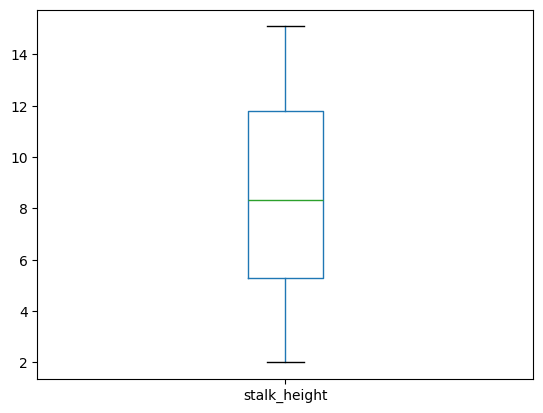

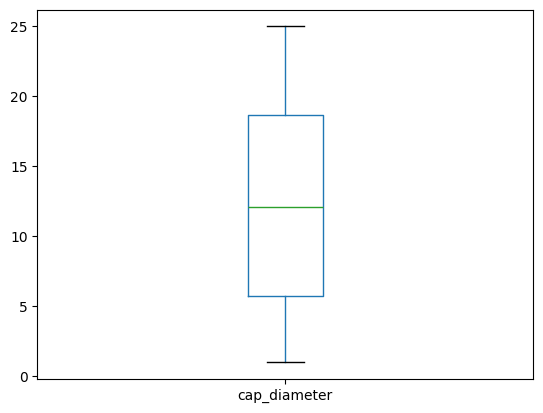

In [11]:
for ft in num_columns :
    plot_boxplot(mush,ft)

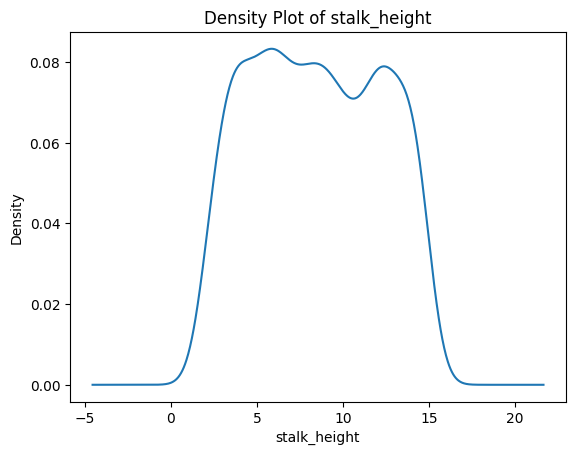

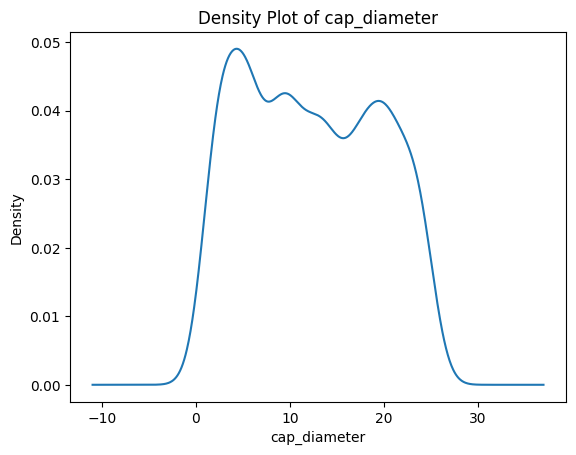

In [12]:
for col in num_columns:
  mush[col].plot.density()
  plt.xlabel(col)  # Label x-axis with current column name
  plt.title(f'Density Plot of {col}')  # Dynamic title for each plot
  plt.show()  # Display each plot

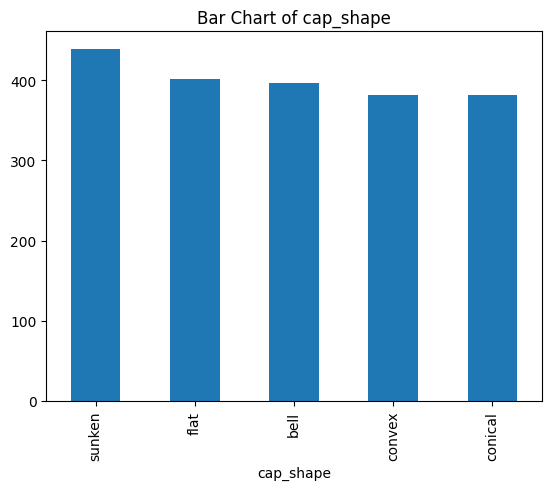

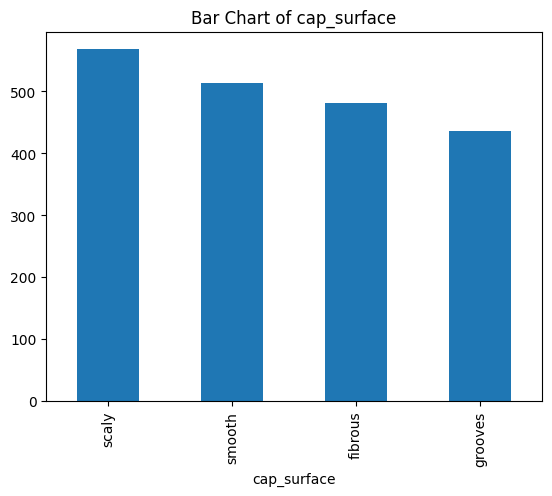

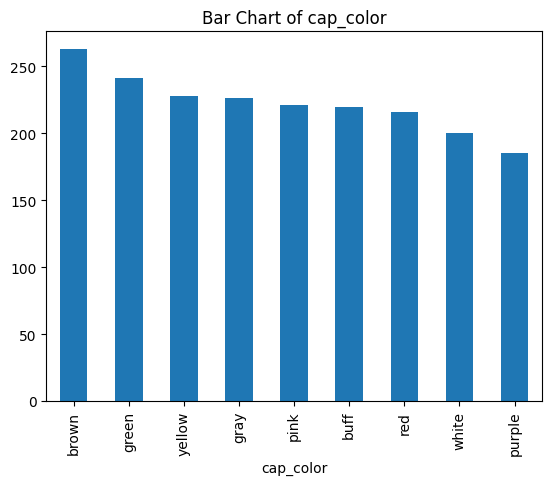

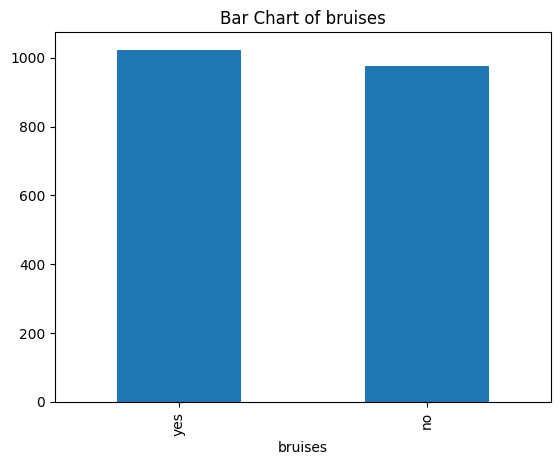

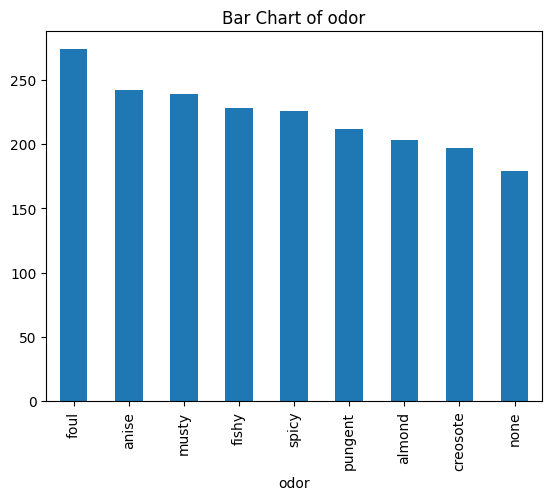

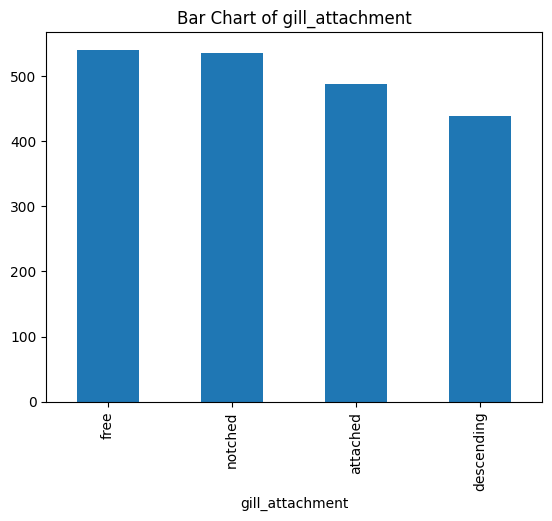

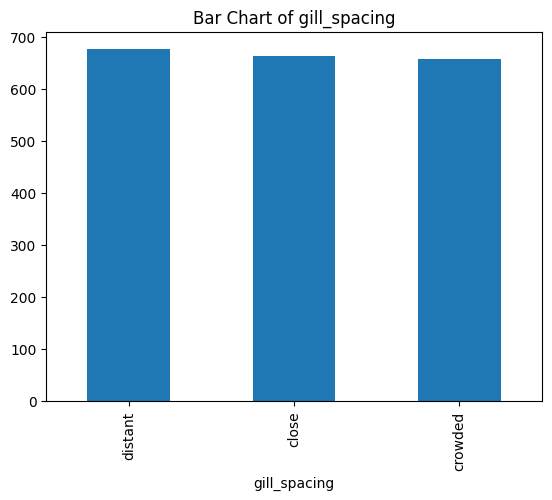

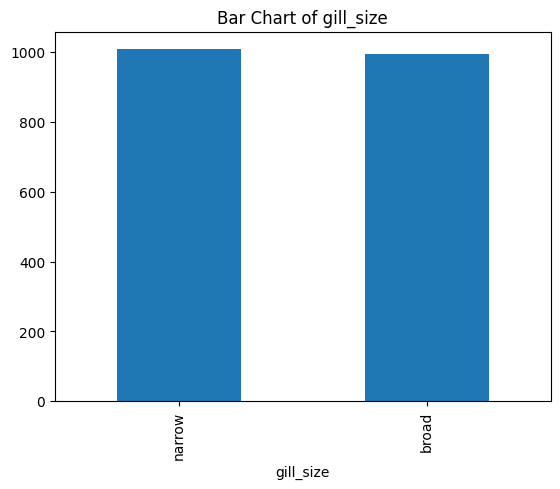

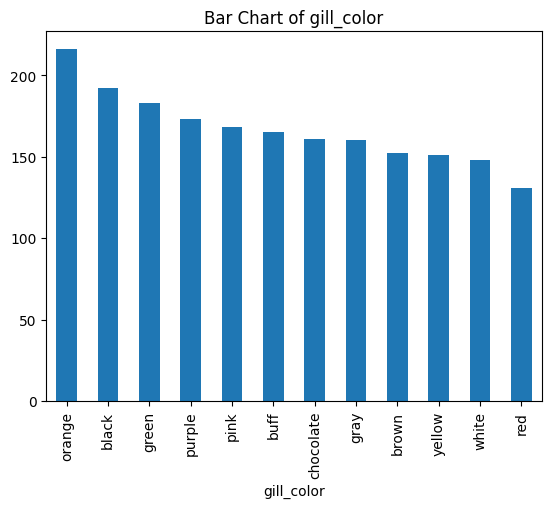

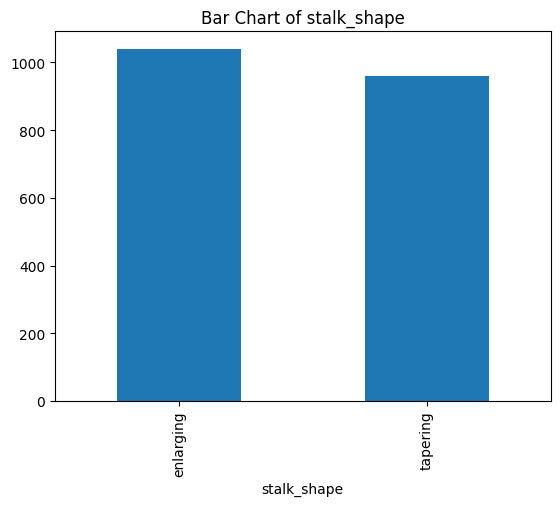

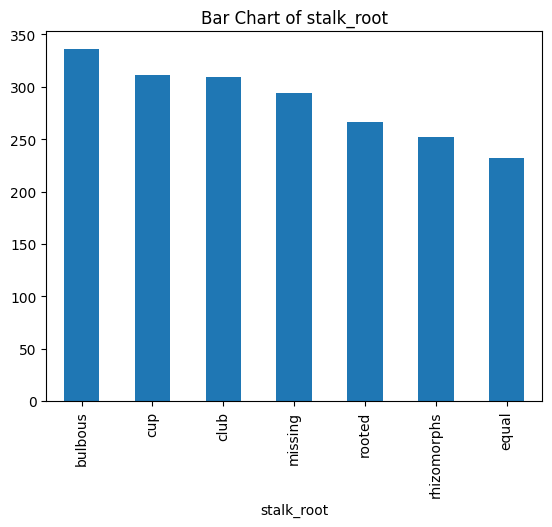

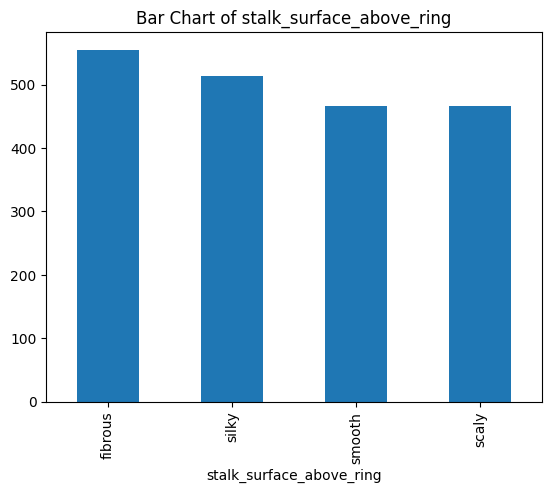

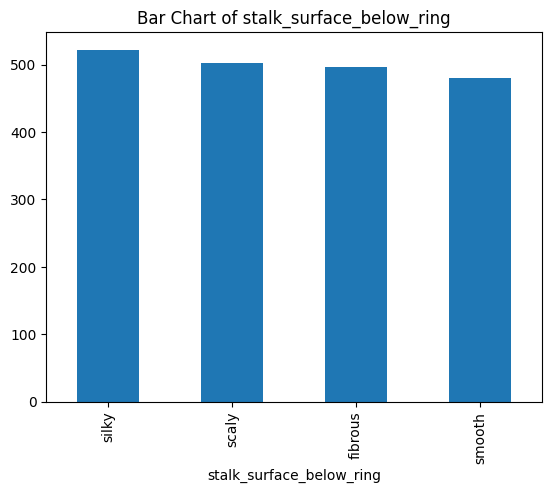

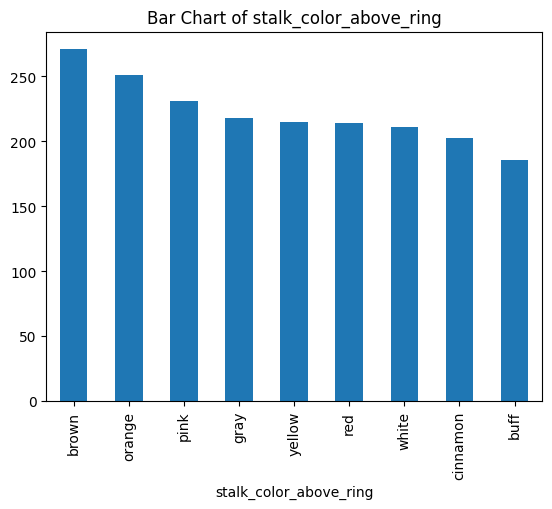

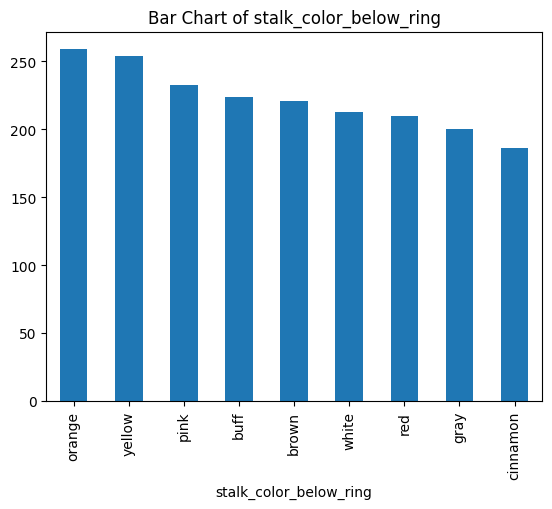

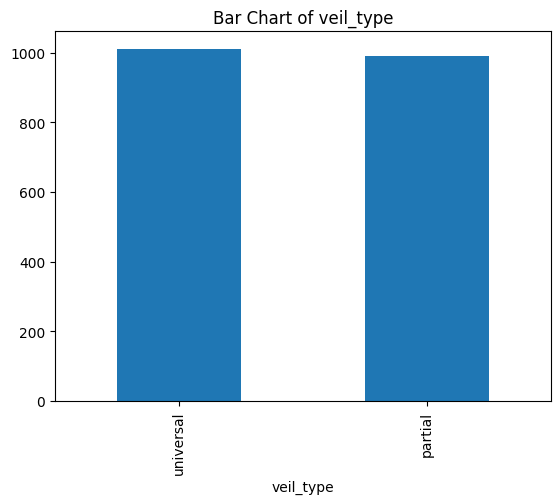

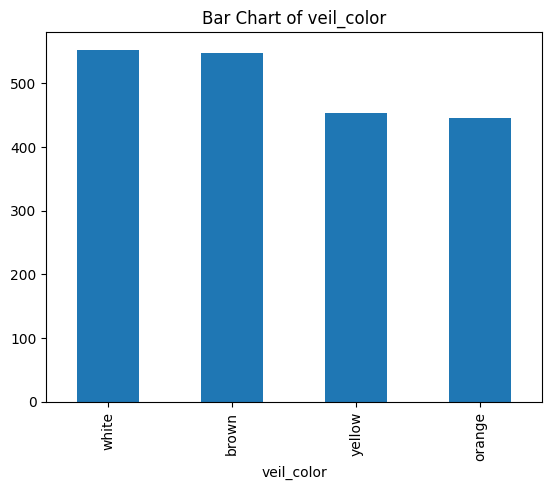

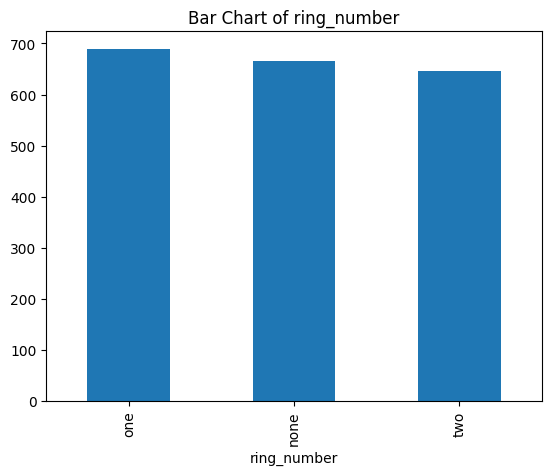

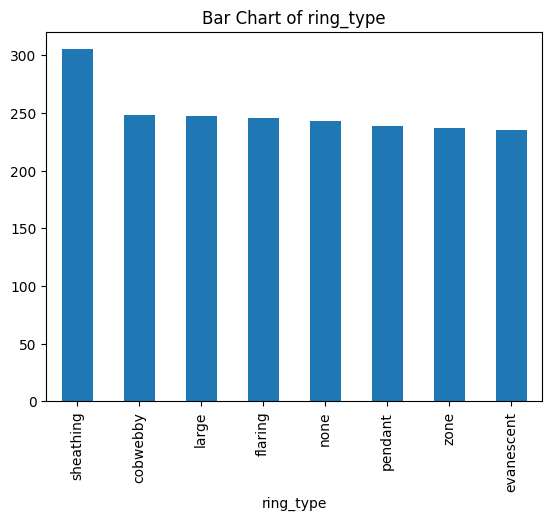

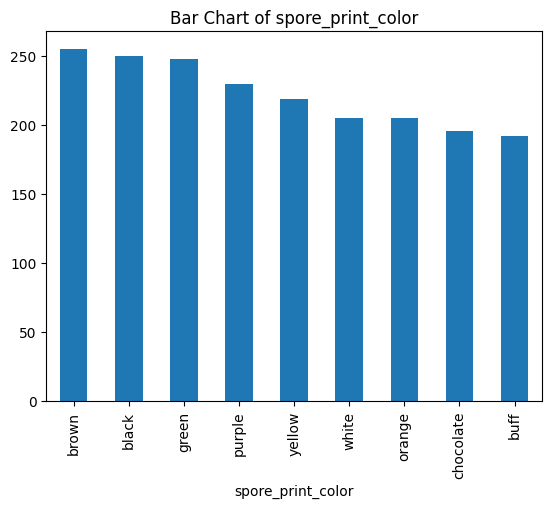

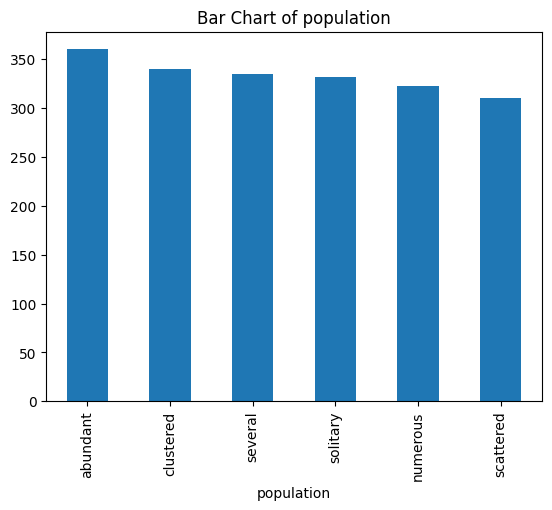

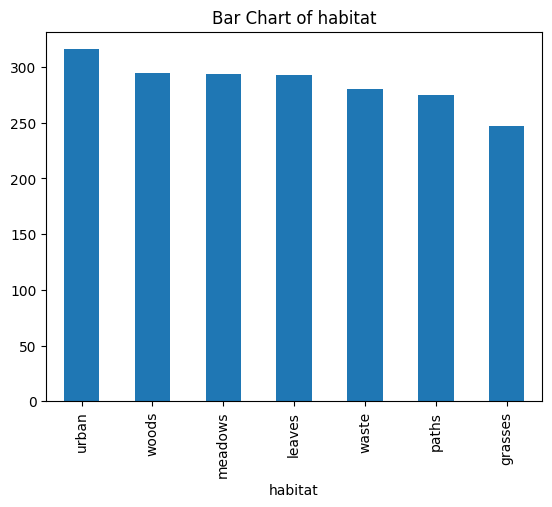

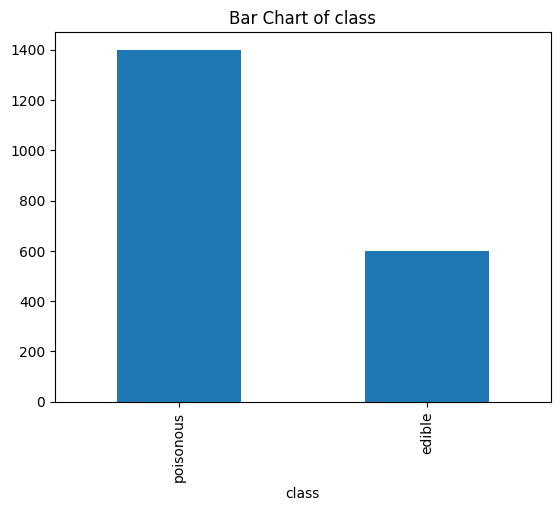

In [13]:
for col in cat_columns:
  mush[col].value_counts().plot(kind='bar')
  plt.xlabel(col)  # Label x-axis with current column name
  plt.title(f'Bar Chart of {col}')  # Dynamic title for each plot
  plt.show()  # Display each plot

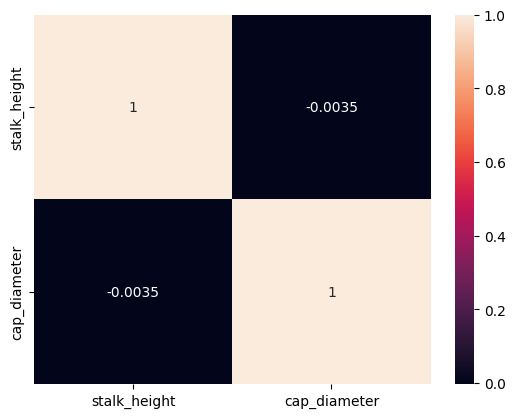

In [14]:
heatmap = sns.heatmap(num_columns.corr(), annot=True)
plt.show()

---
**Data Preprocessing**

---
**Creating Labels for Categorical Data: Machines Understand Only Numerical Data**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'cat_columns' is a list of categorical column names
for col in cat_columns:
    le = LabelEncoder()
    mush[col] = le.fit_transform(mush[col])
mush.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming your data is in a pandas DataFrame named 'df'
X = mush.drop('class', axis=1)  # Features
y = mush['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
**Data Visualization**

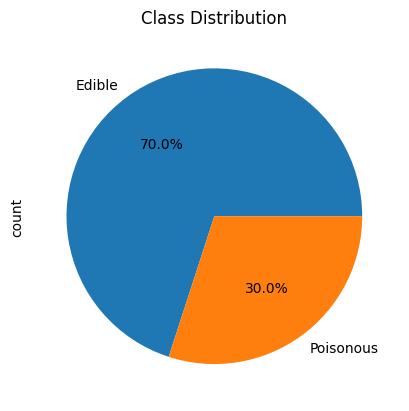

In [17]:
# Create pie chart labels
labels = ['Edible', 'Poisonous']
mush['class'].value_counts().plot.pie(labels=labels,autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

---
**SVM Implementation**

In [18]:
# Create an SVM classifier
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

SVC()

In [19]:
# Make predictions on the testing data
y_pred = svm_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

[[  0 133]
 [  0 267]]


---
**Visualization of SVM Results**

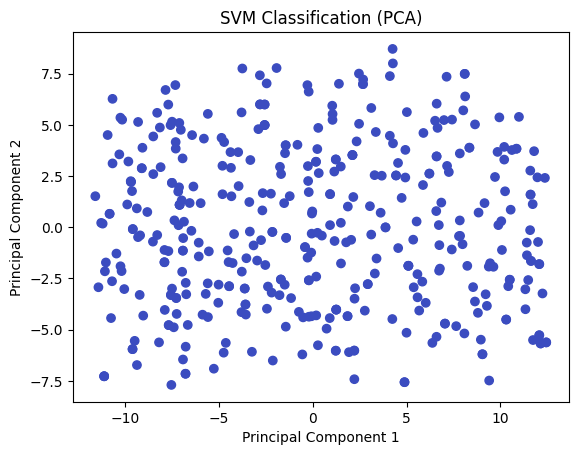

In [20]:
from sklearn.decomposition import PCA

# Reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Classification (PCA)')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [24]:
import xgboost as xgb
import lightgbm as lgb

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 1133, number of negative: 467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.708125 -> initscore=0.886295
[LightGBM] [Info] Start training from score 0.886295


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

Random Forest Accuracy: 0.885
AdaBoost Accuracy: 0.6875
Gradient Boosting Accuracy: 0.7725
XGBoost Accuracy: 0.8875
LightGBM Accuracy: 0.895


In [27]:
print(confusion_matrix(y_test, y_pred_lgb))

[[103  30]
 [ 12 255]]


In [28]:
# Print classification report
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       133
           1       0.89      0.96      0.92       267

    accuracy                           0.90       400
   macro avg       0.90      0.86      0.88       400
weighted avg       0.90      0.90      0.89       400

